In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import warnings
warnings.filterwarnings("ignore")

In [5]:
age_gender = pd.read_csv('age_gender_info.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.shape, test.shape, age_gender.shape, 

((2952, 15), (1022, 14), (16, 23))

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,2952.0,886.661247,513.540168,26.00,513.50,779.00,1106.0000,2568.0
전용면적,2952.0,44.757215,31.874280,12.62,32.10,39.93,51.5625,583.4
전용면적별세대수,2952.0,102.747967,132.640159,1.00,14.00,60.00,144.0000,1865.0
공가수,2952.0,12.921070,10.778831,0.00,4.00,11.00,20.0000,55.0
도보 10분거리 내 지하철역 수(환승노선 수 반영),2741.0,0.176578,0.427408,0.00,0.00,0.00,0.0000,3.0
도보 10분거리 내 버스정류장 수,2948.0,3.695726,2.644665,0.00,2.00,3.00,4.0000,20.0
단지내주차면수,2952.0,601.668360,396.407072,13.00,279.25,517.00,823.0000,1798.0
등록차량수,2952.0,559.768293,433.375027,13.00,220.00,487.00,770.0000,2550.0


In [8]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,1022.0,862.080235,536.340894,75.00,488.000,745.00,1161.0,2572.0
전용면적,1022.0,43.706311,35.890759,9.96,33.135,39.72,47.4,583.4
전용면적별세대수,1022.0,100.414873,125.997855,1.00,14.000,60.00,140.0,1341.0
공가수,1022.0,15.544031,11.070140,0.00,6.000,15.00,23.0,45.0
도보 10분거리 내 지하철역 수(환승노선 수 반영),980.0,0.136735,0.435500,0.00,0.000,0.00,0.0,2.0
도보 10분거리 내 버스정류장 수,1022.0,4.626223,5.414568,1.00,2.000,3.00,5.0,50.0
단지내주차면수,1022.0,548.771037,342.636703,29.00,286.000,458.00,711.0,1696.0


In [9]:
age_gender.head()

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


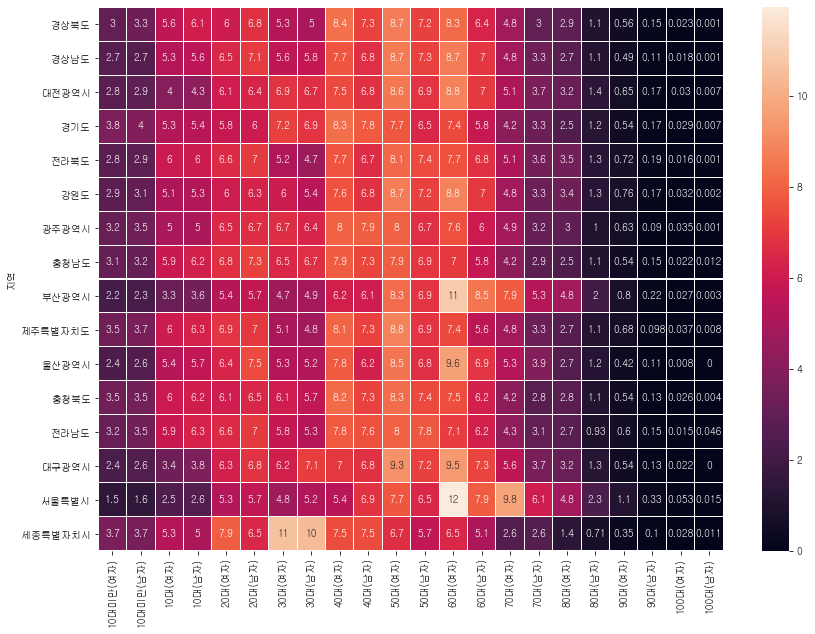

In [10]:
ag = age_gender.set_index('지역')
plt.figure(figsize=(14, 10))
sns.heatmap((ag*100).round(3),
           annot=True, linewidths=0.01,)##

plt.show()

#### 아파트- train

In [11]:
train_apart = train[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형', '임대보증금', '임대료']].loc[train['임대건물구분'] == '아파트']

#### 상가-train

In [12]:
train_shop = train[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형']].loc[train['임대건물구분'] == '상가']

#### 주차수? key는 단지코드인듯- train

In [13]:
train_danji = train[['단지코드', '총세대수', '지역', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']].drop_duplicates()

#### 아파트- test

In [14]:
test_apart = test[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형', '임대보증금', '임대료']].loc[test['임대건물구분'] == '아파트']

#### 상가- test

In [15]:
test_shop = test[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형']].loc[test['임대건물구분'] == '상가']

#### 주차수에 대한 정보 -test

In [16]:
test_danji = test[['단지코드', '총세대수', '지역', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수']].drop_duplicates()

## NA처리

In [17]:
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [18]:
test.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

### 지하철NA-train 

In [19]:
print('전체 단지 수: ', train['단지코드'].nunique())
print('지하철 결측치 단지 수: ', train.loc[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].nunique())
print('지하철 결측치 단지: ', train.loc[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].unique())
print('지하철 결측치 단지 지역: ', train.loc[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['지역'].unique())

전체 단지 수:  423
지하철 결측치 단지 수:  20
지하철 결측치 단지:  ['C1312' 'C1874' 'C1424' 'C2100' 'C2520' 'C1616' 'C1704' 'C2258' 'C1068'
 'C1983' 'C2216' 'C2644' 'C1005' 'C1004' 'C1875' 'C2156' 'C1175' 'C2583'
 'C1649' 'C1350']
지하철 결측치 단지 지역:  ['충청남도' '대전광역시' '경상남도']


### 지하철 NA-test

In [20]:
print('전체 단지 수: ', test['단지코드'].nunique())
print('지하철 결측치 단지 수: ', test.loc[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].nunique())
print('지하철 결측치 단지: ', test.loc[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].unique())
print('지하철 결측치 단지 지역: ', test.loc[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['지역'].unique())

전체 단지 수:  150
지하철 결측치 단지 수:  5
지하철 결측치 단지:  ['C1472' 'C1083' 'C2177' 'C1318' 'C1327']
지하철 결측치 단지 지역:  ['충청남도' '대전광역시']


#### 충청남도- 천안, 대전, 경상남도- 양산/김해 이런 곳에 지하철이 있는것같은데 큰 결측 단지수 자체가 많진 않으니까 그냥찾아봐서 해도 될것같기도함

### 버스 NA-train

In [66]:
train.loc[train['도보 10분거리 내 버스정류장 수'].isnull()]['단지코드'].unique()

array(['C1649'], dtype=object)

In [67]:
train.loc[train['도보 10분거리 내 버스정류장 수'].isnull()]['지역'].unique()

array(['경상남도'], dtype=object)

### 버스 NA-test  -> 없음

### 임대보증금과 임대료 NA- train,test

In [22]:
train.loc[(train['임대건물구분'] != '상가') & (train['임대보증금'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2331,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2332,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2334,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2335,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2336,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2337,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0


In [23]:
test.loc[(test['임대건물구분'] != '상가') & (test['임대보증금'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
76,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0
77,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0
79,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,NaN,NaN,2.0,5.0,428.0


#### 대전,D에서만 결측치가 있는것으로확인 됨   + D는 상가에만 있는 유형
#### C1350(train에서) 	C1006(test에서) 단지 코드를 가짐
#### 상가이지만 아파트로 들어가있는 부분 어떻게 처리하면 좋을지

### test의 자격유형 결측치


In [24]:
test.loc[test['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


In [25]:
test[test['임대건물구분']=='아파트']['자격유형'].unique()

array(['H', 'A', 'E', 'C', 'D', nan, 'G', 'I', 'J', 'K', 'L', 'M', 'N'],
      dtype=object)

In [26]:
train['임대건물구분'].unique()

array(['아파트', '상가'], dtype=object)

#### 아파트 두 경우는 자격유형을 알 수 없으니까 자격유형을 이용한 모델에서는 제외하는것이 어떨까 생각..

## 변수별분포

In [27]:
numeric_cols = []
for col in train.columns:
    if train[col].dtypes != 'object':
        numeric_cols.append(col)

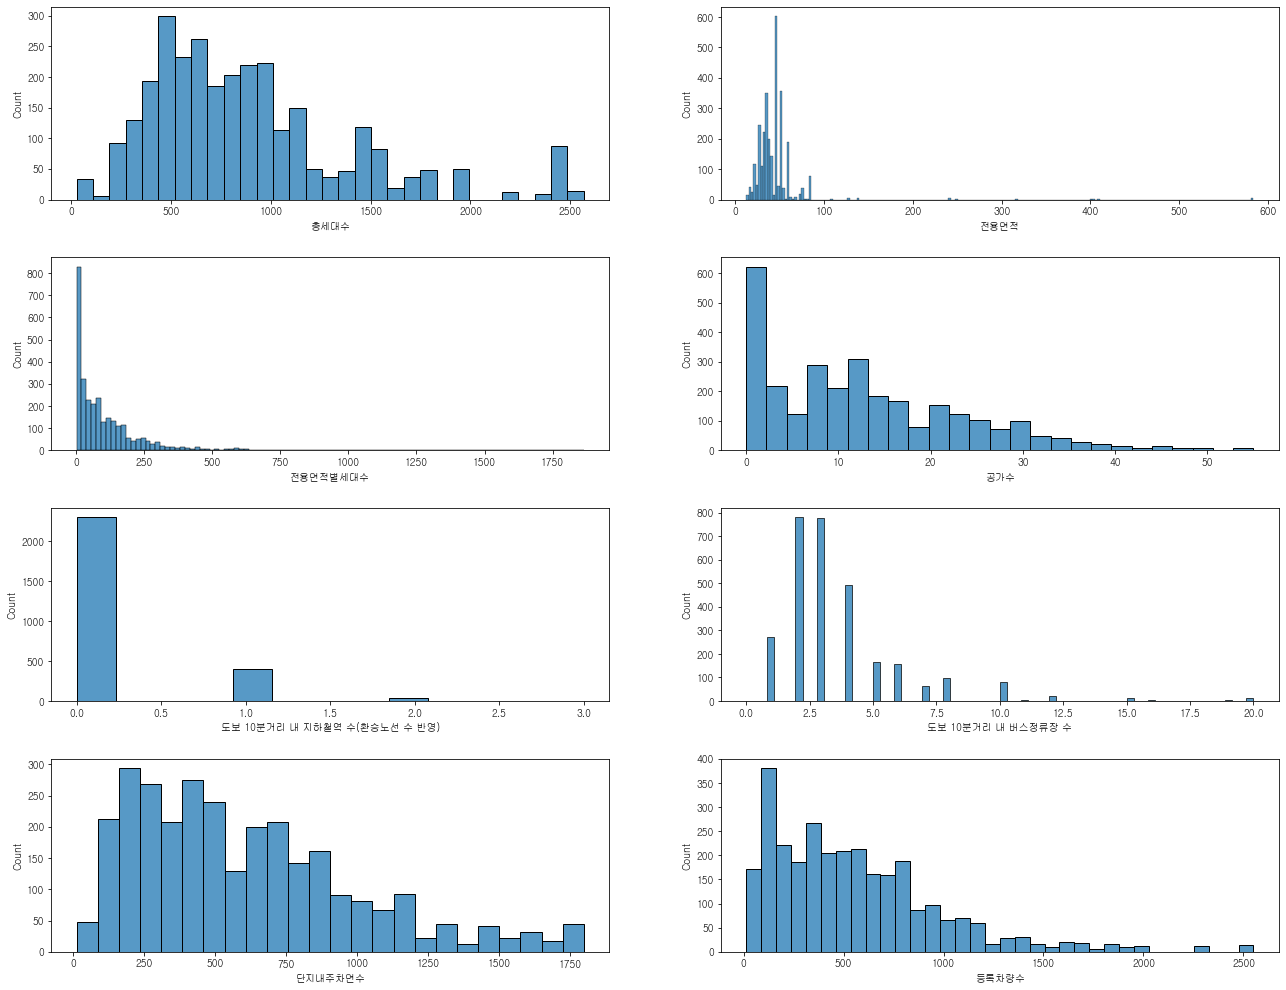

In [28]:
fig = plt.figure(figsize=(22, 22))
for i, n in enumerate(numeric_cols):
    plt.subplot(5, 2, i+1)
    plt.subplots_adjust(hspace=0.3)
    sns.histplot(train[n])

### 상가와 아파트별로 따로 보는게 더 좋겠죠..?

#### 지역별 단지 개수- train

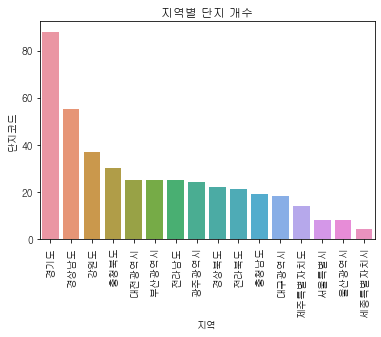

In [29]:
sns.barplot(data=train.groupby(['지역']).nunique().sort_values(by=['단지코드'], ascending=False),
            x=train.groupby(['지역']).nunique().sort_values(by=['단지코드'], ascending=False).index, y='단지코드')
plt.xticks(rotation=90)
plt.title('지역별 단지 개수')
plt.show()

#### 지역별 단지 개수-test

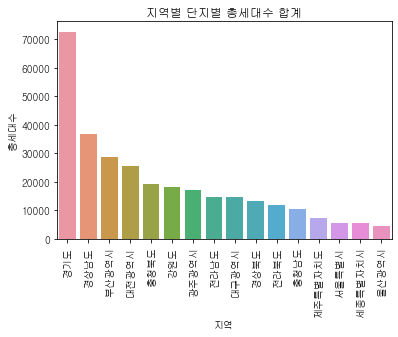

In [30]:
sns.barplot(data=train_danji.groupby(['지역']).sum().sort_values(by=['총세대수'], ascending=False),
            x=train_danji.groupby(['지역']).sum().sort_values(by=['총세대수'], ascending=False).index, y='총세대수')
plt.xticks(rotation=90)
plt.title('지역별 단지별 총세대수 합계')
plt.show()

#### 보이는건 나름 비슷해보임

### 공급 유형별 세대수 합계

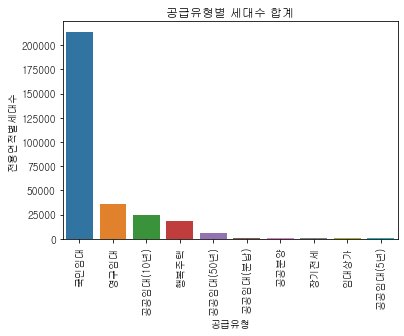

In [31]:
sns.barplot(data=train.groupby(['공급유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False),
            x=train.groupby(['공급유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False).index, y='전용면적별세대수')
plt.xticks(rotation=90)
plt.title('공급유형별 세대수 합계')
plt.show()

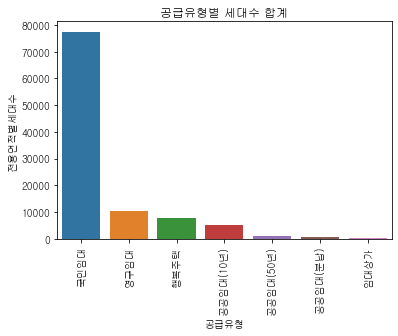

In [32]:
sns.barplot(data=test.groupby(['공급유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False),
            x=test.groupby(['공급유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False).index, y='전용면적별세대수')
plt.xticks(rotation=90)
plt.title('공급유형별 세대수 합계')
plt.show()

### 지역별로 편차가 심할지? / 아니면 그냥 전체로 할지..

### train 데이터에서 상관계수

In [43]:
train2 = train[[ '총세대수', '전용면적', '전용면적별세대수',  '임대보증금', '임대료','단지내주차면수','등록차량수']]

In [49]:
df_corr = train2.corr()
df_corr

,총세대수,전용면적,전용면적별세대수,단지내주차면수,등록차량수
총세대수,1.000000,0.042271,0.098205,0.501488,0.316703
전용면적,0.042271,1.000000,-0.035479,0.071260,0.115453
전용면적별세대수,0.098205,-0.035479,1.000000,0.281989,0.247085
단지내주차면수,0.501488,0.071260,0.281989,1.000000,0.859216
등록차량수,0.316703,0.115453,0.247085,0.859216,1.000000


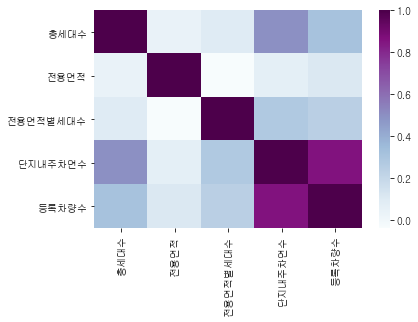

In [63]:
sns.heatmap(df_corr,cmap='BuPu')
plt.show()

#### 총세대수와 등록 차량수와 큰 영향이 있어보임

In [51]:
train3 = train[[ '총세대수', '전용면적', '전용면적별세대수',  '임대보증금', '임대료','단지내주차면수','등록차량수']].loc[train['임대건물구분'] == '아파트']

In [52]:
df_corr3 = train3.corr()
df_corr3

,총세대수,전용면적,전용면적별세대수,단지내주차면수,등록차량수
총세대수,1.000000,-0.056592,0.319700,0.810434,0.652169
전용면적,-0.056592,1.000000,-0.091951,0.179301,0.340676
전용면적별세대수,0.319700,-0.091951,1.000000,0.157107,0.097109
단지내주차면수,0.810434,0.179301,0.157107,1.000000,0.839690
등록차량수,0.652169,0.340676,0.097109,0.839690,1.000000


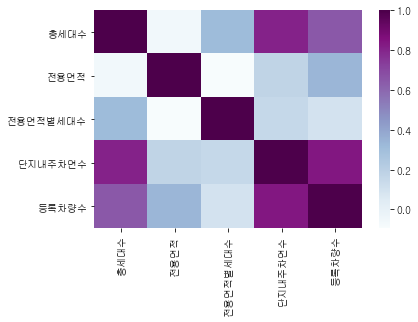

In [64]:
sns.heatmap(df_corr3, cmap='BuPu')
plt.show()

#### 아파트만 보면 총 세대수와 연관이 가장 커짐

In [53]:
train4 = train[[ '총세대수', '전용면적', '전용면적별세대수',  '임대보증금', '임대료','단지내주차면수','등록차량수']].loc[train['임대건물구분'] == '상가']

In [54]:
df_corr4 = train4.corr()
df_corr4

,총세대수,전용면적,전용면적별세대수,단지내주차면수,등록차량수
총세대수,1.000000,0.107010,NaN,0.854012,0.529758
전용면적,0.107010,1.000000,NaN,0.083486,0.064627
전용면적별세대수,NaN,NaN,NaN,NaN,NaN
단지내주차면수,0.854012,0.083486,NaN,1.000000,0.559846
등록차량수,0.529758,0.064627,NaN,0.559846,1.000000


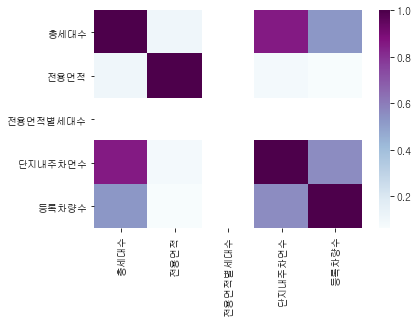

In [65]:
sns.heatmap(df_corr4, cmap='BuPu')
plt.show()

#### 상가만 보면 총 세대수랑 등록차량수와의 연관이 큰것을 확인 가능

## age_gender_info

In [55]:
ag = age_gender.set_index('지역')
ag.loc['전체 평균'] = ag.mean()
ag.loc['광역시 평균'] = ag.loc[(ag.index.str.contains('시')) & (~ag.index.str.contains('세종'))].mean()
ag.loc['도 평균'] = ag.loc[ag.index.str.contains('도')].mean()

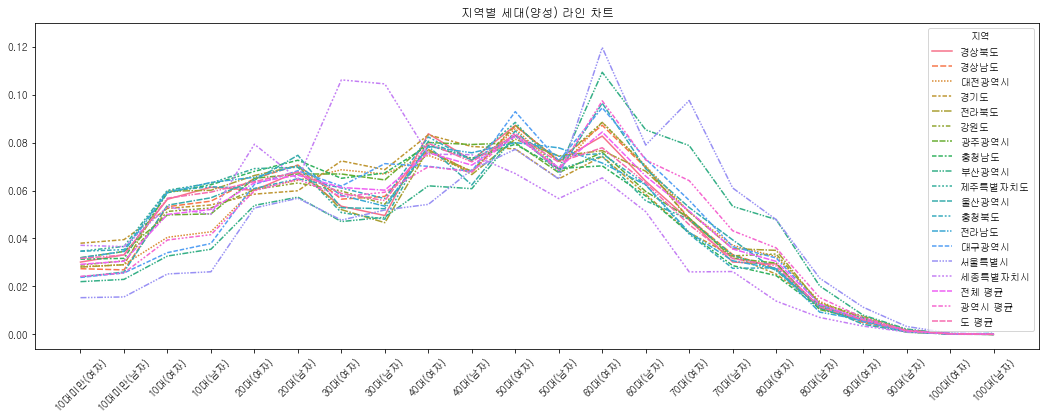

In [56]:
fig = plt.figure(figsize = (18, 6))
sns.lineplot(data=ag.T, )
plt.title('지역별 세대(양성) 라인 차트')
plt.xticks(rotation=45)
plt.ylim(top=0.13)
plt.show()

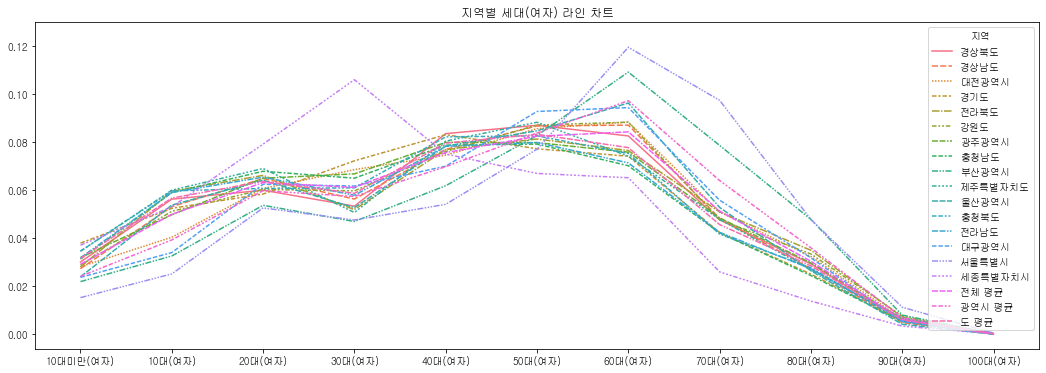

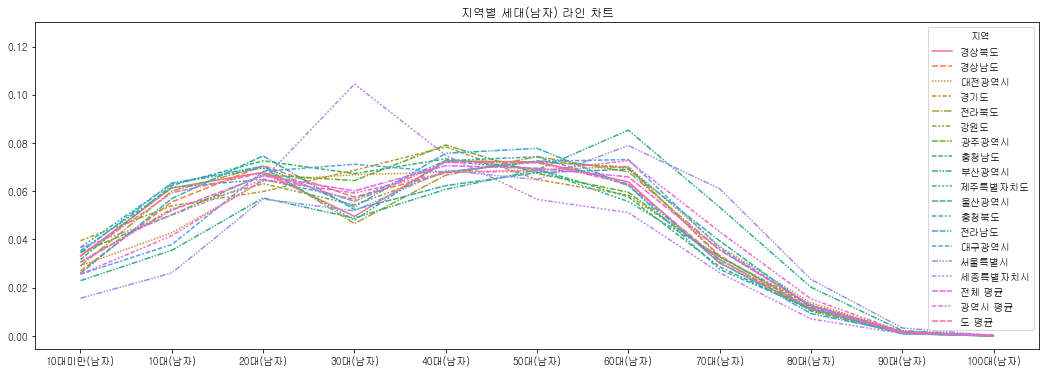

In [57]:
fig = plt.figure(figsize = (18, 6))
sns.lineplot(data=ag.loc[:, ag.columns.str.contains('여자')].T)
plt.title('지역별 세대(여자) 라인 차트')
plt.ylim(top=0.13)
plt.show()

fig = plt.figure(figsize = (18, 6))
sns.lineplot(data=ag.loc[:, ag.columns.str.contains('남자')].T)
plt.title('지역별 세대(남자) 라인 차트')
plt.ylim(top=0.13)
plt.show()

In [68]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
